In [602]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt

In [ ]:
# This strategy is for TLT.

In [603]:
tlt = yf.Ticker("TLT")
df = tlt.history(period = "max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-07-30,41.352723,41.428601,41.236378,41.236378,6100,0.000,0
2002-07-31,41.453947,41.883917,41.428657,41.747337,29400,0.000,0
2002-08-01,41.752347,41.995150,41.752347,41.985035,25000,0.000,0
2002-08-02,42.065994,42.541485,41.924354,42.415024,52800,0.000,0
2002-08-05,42.511136,42.713474,42.415024,42.602188,61100,0.000,0
...,...,...,...,...,...,...,...
2022-12-13,108.776880,108.816784,107.200691,107.440109,23854700,0.000,0
2022-12-14,107.400209,108.058612,106.632062,107.899002,19517500,0.000,0
2022-12-15,108.389999,109.120003,108.160004,108.320000,20246200,0.261,0


In [604]:
df = df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis = 1)
df["Day"] = df.index.day
df["buy"] = [0] * len(df)
df["sell"] = [0] * len(df)
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236378,30,0,0
2002-07-31,41.747337,31,0,0
2002-08-01,41.985035,1,0,0
2002-08-02,42.415024,2,0,0
2002-08-05,42.602188,5,0,0
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [605]:
type(df.index)  # Date index is DateTime type.

pandas.core.indexes.datetimes.DatetimeIndex

In [606]:
# Set the initial capital
initial_capital= float(10000)

In [607]:
df.loc[
    (
        (df["Day"] >= 25)
        #(df["buy"].shift(1) == 0)
    ),
    
"buy"] = 1

# But this causes adjacent "buy" = 1 values.

df.loc[
    (
 
        (df["Day"] <= 7) &
        (df["Day"] > 3)
        #(df["sell"].shift(1) == 0)
    ),
    
"sell"] = 1

# But this causes adjacent "sell" = 1 values.

df.loc[
    (
        (df["buy"].shift(1) == 1)
    ),
    
"buy"] = 0

# Clean the buy values.

df.loc[
    ( 
        (df["sell"].shift(1) == 1)
    ),
    
"sell"] = 0

# Clean the sell values.

In [608]:
df

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236378,30,1,0
2002-07-31,41.747337,31,0,0
2002-08-01,41.985035,1,0,0
2002-08-02,42.415024,2,0,0
2002-08-05,42.602188,5,0,1
...,...,...,...,...
2022-12-13,107.440109,13,0,0
2022-12-14,107.899002,14,0,0
2022-12-15,108.320000,15,0,0


In [609]:
cash_contracts_equity = [initial_capital, 0, initial_capital]
cash_contracts_equity = np.array([cash_contracts_equity] * len(df))

cash_contracts_equity[0][0] = initial_capital  # cash
cash_contracts_equity[0][1] = 0  # contracts
cash_contracts_equity[0][2] = initial_capital  # equity

cash_contracts_equity

array([[10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       ...,
       [10000.,     0., 10000.],
       [10000.,     0., 10000.],
       [10000.,     0., 10000.]])

In [610]:
cash_contracts_equity[0][0]

10000.0

In [611]:
df[0:50]

,Close,Day,buy,sell
Date,,,,
2002-07-30,41.236378,30,1,0
2002-07-31,41.747337,31,0,0
2002-08-01,41.985035,1,0,0
2002-08-02,42.415024,2,0,0
2002-08-05,42.602188,5,0,1
2002-08-06,42.237980,6,0,0
2002-08-07,42.339127,7,0,0
2002-08-08,42.339127,8,0,0
2002-08-09,42.936024,9,0,0


In [612]:
for index, _row in enumerate(df.iterrows()):
    row = _row[1]
    
    
    if row["buy"] == 1:
        cash_contracts_equity[index][1] = (cash_contracts_equity[index][0] / row["Close"])
        cash_contracts_equity[index][0] = 0
    
    elif row["sell"] == 1:
        cash_contracts_equity[index][0] = (cash_contracts_equity[index - 1][1] * row["Close"])
        cash_contracts_equity[index][1] = 0
    
    elif row["buy"] == 0 and row["sell"] == 0:
        cash_contracts_equity[index][1] = cash_contracts_equity[index - 1][1]
        cash_contracts_equity[index][0] = cash_contracts_equity[index - 1][0]
    
        
    cash_contracts_equity[index][2] = (cash_contracts_equity[index][0] + (cash_contracts_equity[index][1] * row["Close"]))

In [613]:
cash_contracts_equity[0:10]

array([[    0.        ,   242.50432637, 10000.        ],
       [    0.        ,   242.50432637, 10123.90991972],
       [    0.        ,   242.50432637, 10181.55261641],
       [    0.        ,   242.50432637, 10285.82677551],
       [10331.21492962,     0.        , 10331.21492962],
       [10331.21492962,     0.        , 10331.21492962],
       [10331.21492962,     0.        , 10331.21492962],
       [10331.21492962,     0.        , 10331.21492962],
       [10331.21492962,     0.        , 10331.21492962],
       [10331.21492962,     0.        , 10331.21492962]])

In [614]:
cash_contracts_equity.T

array([[    0.        ,     0.        ,     0.        , ...,
        10285.84934371, 10285.84934371, 10285.84934371],
       [  242.50432637,   242.50432637,   242.50432637, ...,
            0.        ,     0.        ,     0.        ],
       [10000.        , 10123.90991972, 10181.55261641, ...,
        10285.84934371, 10285.84934371, 10285.84934371]])

In [615]:
df["cash"] = cash_contracts_equity.T[0]
df["contracts"] = cash_contracts_equity.T[1]
df["equity"] = cash_contracts_equity.T[2]
df

,Close,Day,buy,sell,cash,contracts,equity
Date,,,,,,,
2002-07-30,41.236378,30,1,0,0.000000,242.504326,10000.000000
2002-07-31,41.747337,31,0,0,0.000000,242.504326,10123.909920
2002-08-01,41.985035,1,0,0,0.000000,242.504326,10181.552616
2002-08-02,42.415024,2,0,0,0.000000,242.504326,10285.826776
2002-08-05,42.602188,5,0,1,10331.214930,0.000000,10331.214930
...,...,...,...,...,...,...,...
2022-12-13,107.440109,13,0,0,10285.849344,0.000000,10285.849344
2022-12-14,107.899002,14,0,0,10285.849344,0.000000,10285.849344
2022-12-15,108.320000,15,0,0,10285.849344,0.000000,10285.849344


<Figure size 1728x864 with 0 Axes>

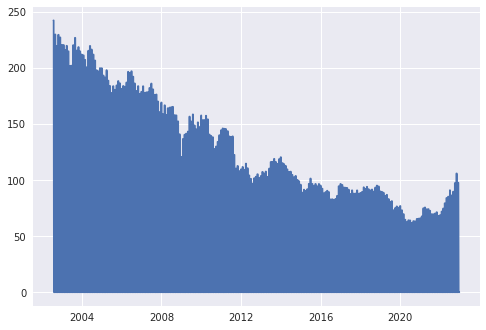

<Figure size 1728x864 with 0 Axes>

In [621]:
plt.style.use("seaborn")
plt.plot(df.index, df["contracts"])
plt.figure(figsize = (24, 12))